CNN classifier for the MNIST dataset

In [ ]:
## PACKAGE IMPORTS ####

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
# If you would like to make further imports from Tensorflow, add them here




The MNIST dataset

It consists of a training set of 60,000 handwritten digits with corresponding labels, and a test set of 10,000 images. The images have been normalised and centred. The dataset is frequently used in machine learning research, and has become a standard benchmark for image classification models. 
Constructing a neural network that classifies images of handwritten digits into one of 10 classes.

Load and preprocess the data

In [ ]:
# Run this cell to load the MNIST data

mnist_data = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_data.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Preprocessing the data by scaling the training and test images so their values lie in the range from 0 to 1.

In [ ]:

def scale_mnist_data(train_images, test_images):
    scaled_train_images=train_images/255.
    scaled_test_images=test_images/255.
    return (scaled_train_images,scaled_test_images)
    """
    This function takes in the training and test images as loaded in the cell above, and scales them
    so that they have minimum and maximum values equal to 0 and 1 respectively.
    Your function should return a tuple (train_images, test_images) of scaled training and test images.
    """
    
    

In [ ]:


scaled_train_images, scaled_test_images = scale_mnist_data(train_images, test_images)

In [ ]:
# Adding a dummy channel dimension

scaled_train_images = scaled_train_images[..., np.newaxis]
scaled_test_images = scaled_test_images[..., np.newaxis]

Buildig the convolutional neural network model


* A 2D convolutional layer with a 3x3 kernel and 8 filters. Use 'SAME' zero padding and ReLU activation functions.
* A max pooling layer, with a 2x2 window, and default strides.
* A flatten layer, which unrolls the input into a one-dimensional tensor.
* Two dense hidden layers, each with 64 units and ReLU activation functions.
* A dense output layer with 10 units and the softmax activation function.



In [ ]:

def get_model(input_shape):
    model=Sequential([Conv2D(8,(3,3),padding='Same',activation='relu',input_shape=input_shape),
                 MaxPooling2D((2,2)),
                 Flatten(),
                 Dense(64,activation='relu'),
                 Dense(64,activation='relu'),    
                 Dense(10,activation='softmax')
                 ])
    return model

    

In [ ]:

model = get_model(scaled_train_images[0].shape)

Compile the model


In [ ]:

def compile_model(model):
    opt=tf.keras.optimizers.Adam()
    acc=tf.keras.metrics.SparseCategoricalAccuracy()
    model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=[acc])

    

In [ ]:
#compililing the model

compile_model(model)

Fitting the model to the training data


In [ ]:

def train_model(model, scaled_train_images, train_labels):
    history=model.fit(scaled_train_images,train_labels,epochs=5)
    return history
    
    

In [ ]:
# function to train the model

history = train_model(model, scaled_train_images, train_labels)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 72s 1ms/sample - loss: 0.2052 - sparse_categorical_accuracy: 0.9391
Epoch 2/5
60000/60000 [==============================] - 71s 1ms/sample - loss: 0.0724 - sparse_categorical_accuracy: 0.9778
Epoch 3/5
60000/60000 [==============================] - 70s 1ms/sample - loss: 0.0493 - sparse_categorical_accuracy: 0.9851
Epoch 4/5
60000/60000 [==============================] - 71s 1ms/sample - loss: 0.0387 - sparse_categorical_accuracy: 0.9877
Epoch 5/5
60000/60000 [==============================] - 70s 1ms/sample - loss: 0.0299 - sparse_categorical_accuracy: 0.9903


Plot the learning curves

We will now plot two graphs:
* Epoch vs accuracy
* Epoch vs loss

We will load the model history into a pandas Dataframe.

In [ ]:

frame = pd.DataFrame(history.history)

In [ ]:
frame.columns=['loss','accuracy']

In [ ]:
frame

,loss,accuracy
0,0.205161,0.939067
1,0.072368,0.977750
2,0.049264,0.985050
3,0.038691,0.987700
4,0.029868,0.990333


[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

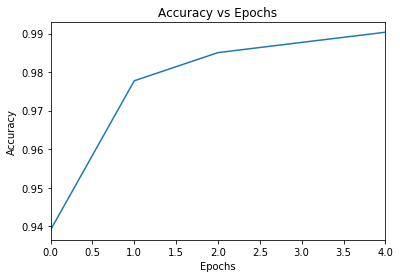

In [ ]:
# Run this cell to make the Accuracy vs Epochs plot

acc_plot = frame.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

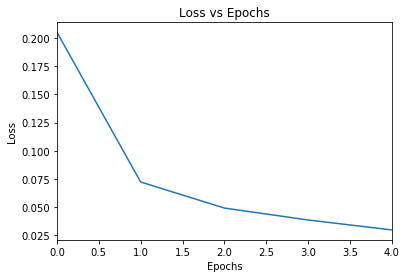

In [ ]:
# Run this cell to make the Loss vs Epochs plot

acc_plot = frame.plot(y="loss", title = "Loss vs Epochs",legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss")

Evaluating the model


In [ ]:

def evaluate_model(model, scaled_test_images, test_labels):
    test_loss,test_accuracy=model.evaluate(scaled_test_images,test_labels,verbose=2)
    return (test_loss,test_accuracy)

    
    

In [ ]:
# Run your function to evaluate the model

test_loss, test_accuracy = evaluate_model(model, scaled_test_images, test_labels)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

10000/1 - 4s - loss: 0.0273 - sparse_categorical_accuracy: 0.9829
Test loss: 0.053966565972322134
Test accuracy: 0.9829000234603882


Model predictions

Let's see some model predictions! We will randomly select four images from the test data, and display the image and label for each. 

For each test image, model's prediction (the label with maximum probability) is shown, together with a plot showing the model's categorical distribution.

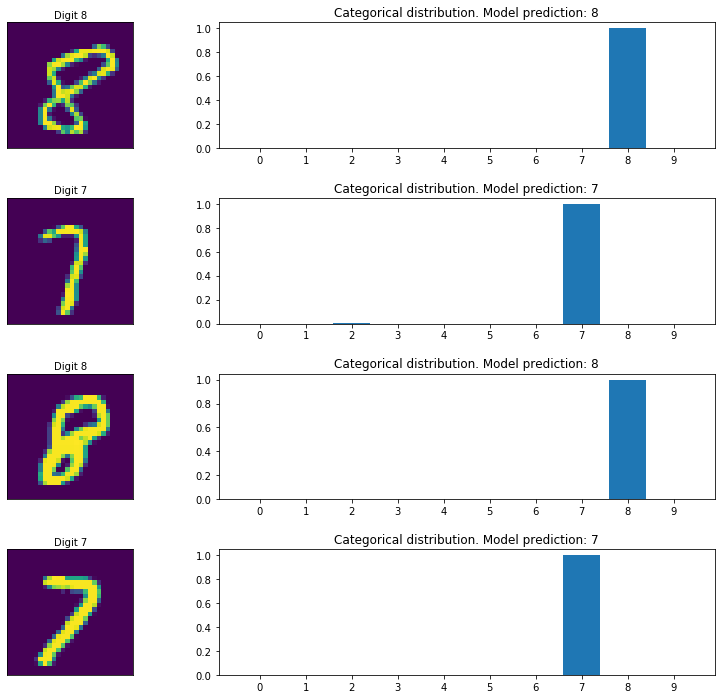

In [ ]:
# Run this cell to get model predictions on randomly selected test images

num_test_images = scaled_test_images.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_test_images = scaled_test_images[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()